In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [ ]:
def get_ml_data():
  ml = fetch_openml(data_id=41187)
  ml_data = ml.data
  ml_labels = ml.target
  labels = np.reshape(ml_labels, (2225, 1))
  final_ml_data = np.concatenate([ml_data, labels], axis = 1)
  ml_ds = pd.DataFrame(final_ml_data)
  features = ml.feature_names
  features.append('co2')
  ml_ds.columns = features

  return ml_ds

In [ ]:
ml_data = get_ml_data()

In [6]:
ml_data.head()

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,0.0,316.1
1,1958.0,4.0,5.0,6.0,0.0,0.0,317.3
2,1958.0,4.0,12.0,4.0,0.0,0.0,317.6
3,1958.0,4.0,19.0,6.0,0.0,0.0,317.5
4,1958.0,4.0,26.0,2.0,0.0,0.0,316.4


Eigenvalues

[5561.5184645   471.96681104  469.47800457  139.49292033  133.85367679
   52.05771656   35.28445157   28.23997516   24.99775856   23.09064122
   21.41193437   20.38353514   19.59266121   19.52861507   18.31917007
   17.54381173   16.85397004   16.70915555   16.4977862    16.27006733
   16.20544393   16.18538954   16.05436168   15.93469307   15.80737346
   15.72885047   15.52980814   15.51578216   15.39085575   15.33219886
   15.08155297   14.82645833   14.40409819   14.14734099   13.93333683
   13.55019533   13.54156565   13.49640772   13.49176983   13.45243817
   13.0683209    13.0532386    12.99424633   12.74010398   12.19592847
   11.785702     11.06689119   10.51823101   10.1208526    10.05254237
    9.39580906    9.36055892]
Eigenvectors

[[ 0.13740495  0.13745511  0.13750874 ...  0.13960515  0.13964376
   0.13968052]
 [-0.17451847 -0.16461121 -0.15210598 ... -0.19327542 -0.18946193
  -0.18279123]
 [ 0.07789705  0.09899802  0.11867617 ...  0.01546305  0.03869349
   0.

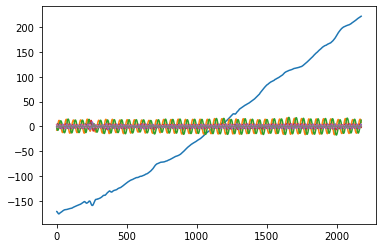

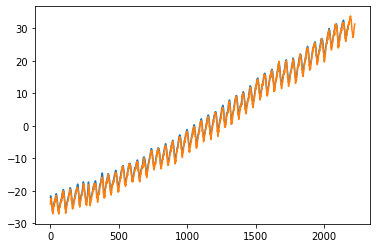

In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


def load_co2_data():
    ml = fetch_openml(data_id=41187)
    return ml.target


def delay_reconstruction(data, m, tau):
    """ Creates a delay coordinates form the features

    inputs :
        data - vector of numbers to be delayed

        m - delay reconstruction embedding dimension ( for each feature )
        tau - time leg

     outputs :
         delay_data - delay coordinates form data
    """

    delay_reconstruction_len = len(data) - (m - 1) * tau;
    delay_data = np.zeros((delay_reconstruction_len, m))

    for delay in np.arange(m):
        delay_data[:, delay] = data[delay * tau: delay_reconstruction_len + delay * tau]

    return delay_data


if __name__ == '__main__':
    co2_data = load_co2_data()
    co2_data = co2_data - np.mean(co2_data)
    # I am trying to have one measurement every mont for 1 year
    #delay_co2_data = delay_reconstruction(co2_data, 12, 4)
    delay_co2_data = delay_reconstruction(co2_data, 52, 1)
    
    pca = PCA()
    # PCA in python works on data X you do not need to construct the covariance matrix X'X
    pca_data = pca.fit_transform(delay_co2_data)
    print('Eigenvalues\n')
    print(pca.singular_values_)
    print('Eigenvectors\n')
    print(pca.components_)

    plt.plot(pca_data[:, 0:8])
    plt.show()

    n = 6
    first_components = np.zeros(pca_data.shape)
    first_components[:, 0:n] = pca_data[:, 0:n]

    signal_from_first_components = np.dot(pca.components_[:,0], first_components.transpose())


    plt.plot(signal_from_first_components)
    plt.plot(co2_data)
    plt.show()

In [7]:
pca.components_.shape

(52, 52)

In [22]:
pca.explained_variance_ratio_

array([9.84454891e-01, 7.59152253e-03, 6.43411021e-03, 6.75410795e-04,
       5.12504424e-04, 8.09058997e-05, 5.38621540e-05, 4.44043417e-05,
       4.10394607e-05, 3.88489538e-05, 3.65905590e-05, 3.59095312e-05])

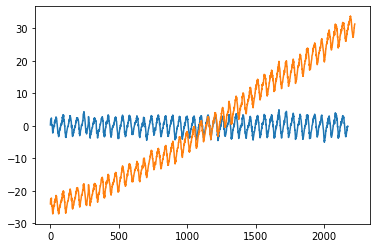

In [30]:
m = 51
last_components = np.zeros(pca_data.shape)
last_components[:, -m:] = pca_data[:, -m:]

#signal_from_last_components = np.dot(pca.components_[:,0], last_components.transpose())
signal_from_last_components = (pca.components_[:,0] @ last_components.transpose())


plt.plot(signal_from_last_components)
plt.plot(co2_data)
plt.show()

In [6]:
def last_component(m = 1):
    last_components = np.zeros(pca_data.shape)
    last_components[:, -m:] = pca_data[:, -m:]
    
    signal_from_last_components = (pca.components_[:,0] @ last_components.transpose())
    
    return signal_from_last_components

In [7]:
import gudhi as gd

In [12]:
last_components = last_component(4)
cc = gd.CubicalComplex( top_dimensional_cells = last_components)

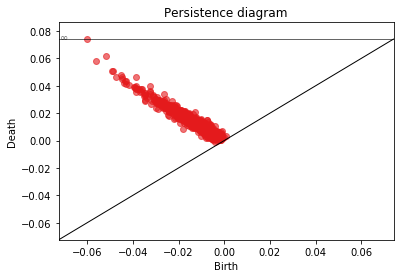

In [13]:
dgm = cc.persistence()
plot = gd.plot_persistence_diagram(dgm)